# Compare 2 Surf En

In [35]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from calculations import observables as calc
from calculations import triangular as tri
from manage import utils

sns.set_theme()

###

data_dirs = [
    "/home/max/projects/apfc/data/05n0",
    "/home/max/projects/apfc/data/05n0"
]

surf_en_indeces = [-1, -1]

names = ["05n0", "06base"]

colors = ["r", "b"]
line_widths = [1, 0.5]

normalize = False

05n0 eps: 0.0388, gamma0: 0.3371
06base eps: 0.0388, gamma0: 0.3371


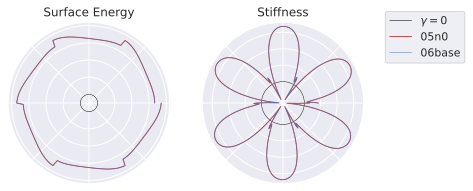

In [44]:
def norm(arr):
    ret = arr - np.min(arr)
    return ret / np.max(ret) 



def fill(arr, div, add=False):

    max_ = np.max(arr)

    o_arr = arr.copy()[1:]
    do_add_int = int(add)

    for i in range(1, div):
        add_arr = do_add_int * i * max_
        arr = np.hstack([arr, o_arr + add_arr])

    return arr

configs = []
thetas = []
thetas_str = []
surf_ens = []
stiffs = []
fits = []

for data_dir in data_dirs:

    ### Config ###

    config_path = f"{data_dir}/config.json"
    with open(config_path, "r") as f:
        config = json.load(f)

    ### Surf En ###

    surf_en = pd.read_csv(f"{data_dir}/evaluate/surf_en.csv", index_col=0)
    surf_en = surf_en.apply(pd.to_numeric)

    ### Thetas ###

    theta_str = surf_en.columns.to_numpy()
    theta = utils.get_thetas(config)

    ### stiffness ###

    stiff = pd.read_csv(f"{data_dir}/evaluate/stiff.csv", index_col=0)
    stiff = stiff.apply(pd.to_numeric)

    ## fits ###

    fit = pd.read_csv(f"{data_dir}/evaluate/fits.csv", index_col=0)
    fit = fit.apply(pd.to_numeric)

    ### Fill ###

    div = config["thetaDiv"]
    #theta = utils.fill(theta, div, True)
    theta = fill(theta, 6, True)

    ### Appends ###normalize
    
    configs.append(config)
    surf_ens.append(surf_en)
    thetas.append(theta)
    thetas_str.append(theta_str)
    stiffs.append(stiff)
    fits.append(fit)

###

fig = plt.figure()
ax_surf = plt.subplot(121, projection="polar")
ax_stiff = plt.subplot(122, projection="polar")

ax_surf.set_aspect("equal")
ax_stiff.set_aspect("equal")

plot_stiff = []
plot_surf = []
surf_lim = [0., 0.]
stiff_lim = [0., 0.]

for i in range(len(surf_ens)):

    surf = surf_ens[i].iloc[surf_en_indeces[i], :].to_numpy()
    stiff = stiffs[i].iloc[surf_en_indeces[i], :].to_numpy()

    surf = fill(surf, 6)
    stiff = fill(stiff, 6)

    if normalize:

        surf = norm(surf)
        stiff = norm(stiff)

    plot_stiff.append(stiff)
    plot_surf.append(surf)

    surf_lim[0] = np.min([surf_lim[0], np.min(surf)])
    stiff_lim[0] = np.min([stiff_lim[0], np.min(stiff)])

    surf_lim[1] = np.max([surf_lim[1], np.max(surf)])
    stiff_lim[1] = np.max([stiff_lim[1], np.max(stiff)])

add_lim = 0.05

surf_lim[1] += add_lim
stiff_lim[1] += add_lim

surf_lim[0] -= add_lim
stiff_lim[0] -= add_lim

if surf_lim[0] < 0 < surf_lim[1]:
    ax_surf.plot(thetas[0], np.zeros(thetas[0].shape), c="black", lw=0.5)

if stiff_lim[0] < 0 < stiff_lim[1]:
    ax_stiff.plot(thetas[0], np.zeros(thetas[0].shape), c="black", label="$\\gamma=0$", lw=0.5)

for i in range(len(plot_surf)):

    ax_surf.plot(thetas[i], plot_surf[i], c=colors[i], label=names[i], lw=line_widths[i])
    ax_stiff.plot(thetas[i], plot_stiff[i], c=colors[i], label=names[i], lw=line_widths[i])

    eps, gamma0 = tri.fit_surf_en(thetas[i], plot_surf[i])
    print(names[i], f"eps: {eps:.4f}, gamma0: {gamma0:.4f}")

ax_surf.set_title("Surface Energy")
ax_stiff.set_title("Stiffness")
ax_stiff.legend(bbox_to_anchor=(1.1, 1.1))

ax_surf.set_xticklabels([])
ax_surf.set_yticklabels([])
ax_stiff.set_xticklabels([])
ax_stiff.set_yticklabels([])

ax_surf.set_ylim(surf_lim)
ax_stiff.set_ylim(stiff_lim)

plt.show()

In [15]:
x = np.linspace(0, 2 * np.pi, 10000)

y1 = calc.theo_surf_en(x, -0.02, 0.3)
y2 = calc.theo_surf_en(x, 0.2, 0.3)

stiff1 = calc.calc_stiffness(y1, x)
stiff2 = calc.calc_stiffness(y2, x)

plt.figure()
ax = plt.subplot(121, projection="polar")
ax2 = plt.subplot(122, projection="polar")
ax.set_aspect("equal")
ax2.set_aspect("equal")
ax.plot(x, y1, label="y1")
ax.plot(x, y2, label="y2")
ax2.plot(x, stiff1, label="y1")
ax2.plot(x, stiff2, label="y2")

ax.set_xticklabels([])
ax.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax.set_ylim([0, np.max([np.max(y1), np.max(y2)]) + 0.03])

plt.show()

AttributeError: module 'calculations.observables' has no attribute 'theo_surf_en'

In [82]:
def norm(arr):
    ret = arr - np.min(arr)
    return ret / np.max(ret) 

def fill(arr, div, add=False):

    max_ = np.max(arr)

    o_arr = arr.copy()[1:]
    do_add_int = int(add)

    for i in range(1, div):
        add_arr = do_add_int * i * max_
        arr = np.hstack([arr, o_arr + add_arr])

    return arr

a = np.array([0, 0.5, 1])

print(norm(a))

print(fill(a, 3, True))

print(np.pi /3)

[0.  0.5 1. ]
[0.  0.5 1.  1.5 2.  2.5 3. ]
1.0471975511965976


[50. 25.] [[ 2.42131030e-32 -5.00484034e-39]
 [-5.00484034e-39  6.75783598e-31]]
25.00000000000003


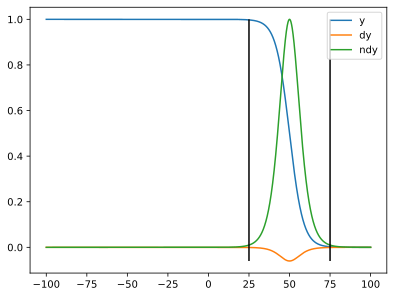

In [23]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy

def tanhmin(radius: np.array, eps: float) -> np.array:
    return 0.5 * (1.0 + np.tanh(-3.0 * radius / eps))
def norm(arr):
    ret = arr - np.min(arr)
    return ret / np.max(ret) 

r = 50
eps = 25
scale = 1

x = np.linspace(-100, 100, 10000)
dx = np.abs(x[0] - x[1])
y = tanhmin(x - r, eps) * scale

plt.figure()
plt.plot(x, y, label = "y")

dy = np.gradient(y, x)
plt.plot(x, dy, label="dy")

ndy = norm(np.abs(dy))
plt.plot(x, ndy, label="ndy")

indy = scipy.integrate.simpson(ndy, x)

#ilen = ndy[ndy >= 1e-1].shape[0] * dx
ilen = 2 * indy

tfit = lambda x, r, eps: tanhmin(x - r, eps)
popt, pcov = scipy.optimize.curve_fit(tfit, x, y / np.max(y))

print(popt, pcov)
ilen = popt[1]

print(ilen)

plt.vlines(x=r - ilen, ymin=np.min(dy), ymax=scale, color="black")
plt.vlines(x=r + ilen, ymin=np.min(dy), ymax=scale, color="black")

plt.legend()
plt.show()